In [ ]:
! pip install nose
import nose.tools as nt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 10.6 MB/s 


# Nussinov 
This is part of my final project for CS 466. I will be implementing Nussinov's Algorithm to predict the secondary RNA structure of RNA/find the maximum number of pseudoknot-free complementary base pairs.




## Dataset

The following data structure consists of the sequences I will be using to test my implementation. Note that this list is not large. Nussinov backtraces can lead to multiple different solutions, so I kept the list short for ease of understanding. To compensate for this small dataset, I will make sure to check the complete table for some of the sequences to ensure my implementation is correct. These sequences together also account for all of the recurisve cases of the algorithm.

Nussinov's algorithm is also mainly focused on filling out the DP table and returning the maximum number of base pairs, so the traceback step I added is more of an additional task (like I mentioned in my project proposal).

The structure of this "dataset" is a list, where each entry contains 3 strings. The first string is the sequence, the second string is the corresponding dot-parentheses structure that indicates the secondary structure of the RNA sequence, and the last string is the # of complementary base pairs. 

These sequences were obtained from the RCSB Protein Data Bank and were checked to make sure they are all pseudoknot-free.

In [ ]:
dataset = [
    ["GGGAAAUCC", ".((..()))", 3],
    ["GCGCGCGCGCGCGCGCGCGCGCGC", "(((((((((((())))))))))))", 12],
    ["GGUGUGAACACC", "(((((.).))))", 5],
    ["GCACGACG", "().((.))", 3],
    ["GGAAACCGAAAC", "((...)()...)", 3]
]

## Implementation

### Identify Base Pairs

Write function to identify base pairs:



In [ ]:
def is_base_pair(pair):
  pairs = {"A":"U", "U":"A", "G":"C", "C":"G"}
  if pair in pairs.items():
    return True
  return False

### Fill DP Table

Now, we will be filling out our dynamic programming table according to the below algorithm:
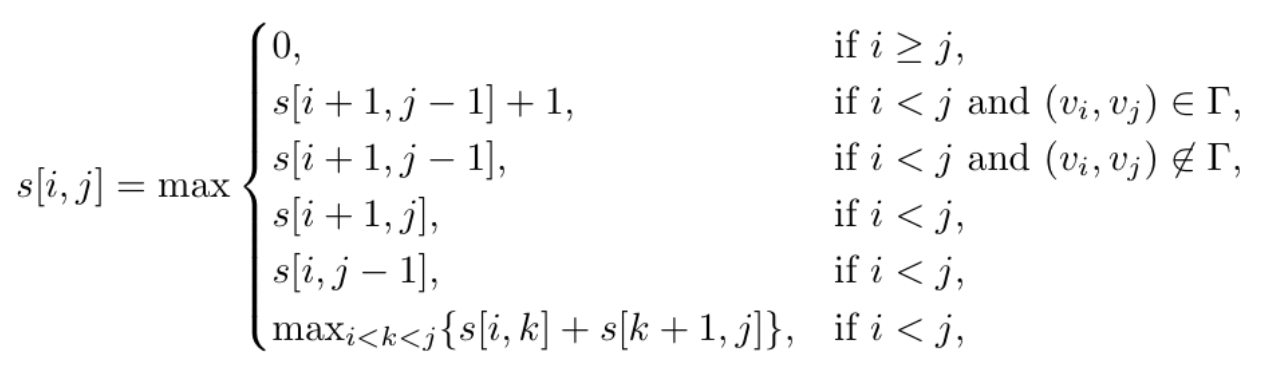


In [ ]:
def fill_nussinov(seq):
  n = len(seq)
  s = [[0 for _ in range(n)] for _ in range(n)]
  for diff in range(1, n):
    for i in range(n - diff):
      j = i + diff
      if j >= i:
        down = s[i + 1][j]
        left = s[i][j - 1]
        diag = s[i + 1][j - 1] + is_base_pair((seq[i], seq[j]))
        bif = max(s[i][k] + s[k + 1][j] for k in range(i, j))

        s[i][j] = max(down, left, diag, bif)
  
  answer = s[0][-1]
  return answer, s

### Traceback and Convert

Perform traceback and convert to dot-parentheses notation:

In [ ]:
def traceback(s, seq, pairs, i, j):
  if i < j:
    if s[i][j] == s[i + 1][j]:
      traceback(s, seq, pairs, i + 1, j)
    elif s[i][j] == s[i][j - 1]:
      traceback(s, seq, pairs, i, j - 1)
    elif s[i][j] == s[i + 1][j - 1] + 1:
      pairs.append((i,j))
      traceback(s, seq, pairs, i + 1, j - 1)
    else:
      for k in range(i + 1, j - 1):
        if s[i][j] == s[i][k] + s[k + 1][j]:
          traceback(s, seq, pairs, k + 1, j)
          traceback(s, seq, pairs, i, k)
          break

    return pairs

def convert_pairs(seq, pairs):
  dot_parentheses = ["." for _ in range(len(seq))]
  for (i,j) in pairs:
    dot_parentheses[i] = "("
    dot_parentheses[j] = ")"
  
  return "".join(dot_parentheses)


## Testing

Check table values for 2 sequences where we know what the final table looks like:


In [ ]:
seq = "GGGAAAUCC"
ans, table = fill_nussinov(seq)

# Check if final value is correct
nt.assert_equal(ans, 3)

# Check if table is correct
table_answer = [[0, 0, 0, 0, 0, 0, 1, 2, 3], 
                [0, 0, 0, 0, 0, 0, 1, 2, 3], 
                [0, 0, 0, 0, 0, 0, 1, 2, 2], 
                [0, 0, 0, 0, 0, 0, 1, 1, 1], 
                [0, 0, 0, 0, 0, 0, 1, 1, 1], 
                [0, 0, 0, 0, 0, 0, 1, 1, 1], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0]]
nt.assert_equal(table_answer, table)

# Check if traceback is correct
pairs = traceback(table, seq, [], 0, len(seq) - 1)
nt.assert_equal(".((..()))", convert_pairs(seq, pairs))

In [ ]:
seq = "GCACGACG"
ans, table = fill_nussinov(seq)

# Check if final value is correct
nt.assert_equal(ans, 3)

# Check if table is correct
table_answer = [[0, 1, 1, 1, 2, 2, 2, 3],
                [0, 0, 0, 0, 1, 1, 1, 2],
                [0, 0, 0, 0, 1, 1, 1, 2],
                [0, 0, 0, 0, 1, 1, 1, 2],
                [0, 0, 0, 0, 0, 0, 1, 1],
                [0, 0, 0, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 0, 0, 0, 0]]
nt.assert_equal(table_answer, table)

# Check if traceback is correct
pairs = traceback(table, seq, [], 0, len(seq) - 1)
nt.assert_equal("().((.))", convert_pairs(seq, pairs))

Now loop through the rest of the sequences to see if our implementation is working correctly:

In [ ]:
# Loop through test cases
for entry in dataset:
  seq = entry[0]
  dot_parentheses = entry[1]
  num_pairs = entry[2]

  ans, table = fill_nussinov(seq)
  pairs = traceback(table, seq, [], 0, len(seq) - 1)
  converted_pairs = convert_pairs(seq, pairs)

  # Check if final answer is correct
  nt.assert_equal(ans, num_pairs)

  # Check if the final structure returned is correct
  nt.assert_equal(dot_parentheses, converted_pairs)
